In [ ]:
#---------------------------------Torch Modules --------------------------------------------------------
from __future__ import print_function
import numpy as np
import pandas as pd
import torch.nn as nn
import math
import torch.nn.functional as F
import torch
import torchvision
from torch.nn import init
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision import models
import torch.nn.functional as F
from torch.utils import data
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import Dataset
import torch

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

<ipython-input-3-ccaea10032c1>:4: RuntimeWarning: covariance is not positive-semidefinite.
  x, y = np.random.multivariate_normal(mean, cov, 500).T
<ipython-input-3-ccaea10032c1>:11: RuntimeWarning: covariance is not positive-semidefinite.
  x1, y1 = np.random.multivariate_normal(mean, cov, 500).T
<ipython-input-3-ccaea10032c1>:18: RuntimeWarning: covariance is not positive-semidefinite.
  x2, y2 = np.random.multivariate_normal(mean, cov, 500).T


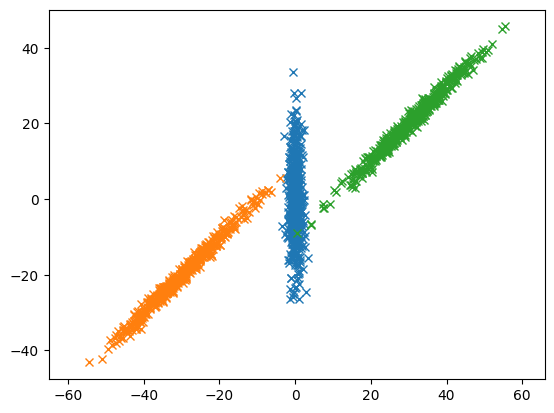

In [ ]:

#Class-1
mean = [0, 0]
cov = [[1, 1], [0, 100]]
x, y = np.random.multivariate_normal(mean, cov, 500).T
plt.plot(x, y, 'x')
plt.axis('equal')

#Class-2
mean = [-30, -20]
cov = [[0, 1], [100, 100]]
x1, y1 = np.random.multivariate_normal(mean, cov, 500).T
plt.plot(x1, y1, 'x')
plt.axis('equal')

#Class-3
mean = [30, 20]
cov = [[0, 1], [100, 100]]
x2, y2 = np.random.multivariate_normal(mean, cov, 500).T
plt.plot(x2, y2, 'x')
plt.show()

## Plotting unlabelled data

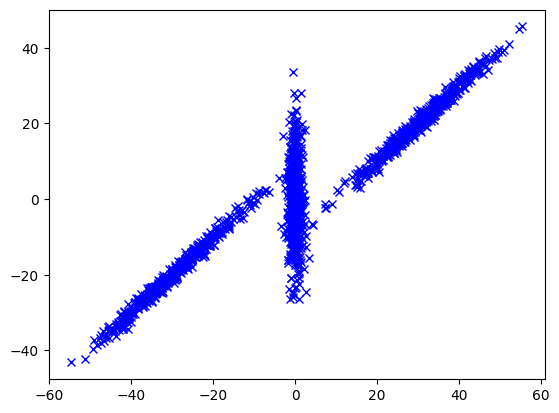

In [ ]:
# unlabelled Data
plt.plot(x, y, 'x',c='b')
plt.plot(x1, y1, 'x',c='b')
plt.plot(x2, y2, 'x',c='b')
plt.show()


# Combine Data for training

In [ ]:
#  Data
X = np.concatenate((np.concatenate((np.expand_dims(x,0),np.expand_dims(y,0)),axis=0),
                    np.concatenate((np.expand_dims(x1,0),np.expand_dims(y1,0)),axis=0),
                    np.concatenate((np.expand_dims(x2,0),np.expand_dims(y2,0)),axis=0)), axis=-1).T
c0 = np.zeros(x.shape[0])
c1 = np.ones(x1.shape[0])
c2 = np.ones(x2.shape[0])*2
#  labels
Y = np.concatenate((c0,c1,c2)).T

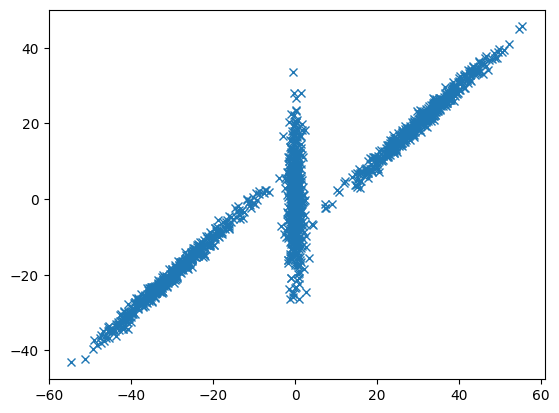

In [ ]:
# unlabelled data
plt.plot(X[:,0],X[:,1],'x')
plt.show()

In [ ]:
X = X.tolist()
Y = Y.tolist()

# K-Means

In [ ]:
import sys
import seaborn as sns
import time

In [ ]:
# Helper Functions
def find_euclidean_dist(p1,p2):
  return np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def calculate_centroid(points):
  points = np.array(points)
  return np.mean(points,axis=0).tolist()

def isEqual(p1,p2):
  return p1[0]==p2[0] and p1[1]==p2[1]

def sse_loss(points,assigned_clusters,clusters):
  loss_value = 0
  for c, pc in clusters.items():
    for j in range(len(points)):
      if assigned_clusters[i]==c:
        loss_value += np.square(find_euclidean_dist(px,pc))
  return loss_value

In [ ]:
trace = False

In [ ]:
k_value = []
losses = []
all_centroids = []
all_labels = []
for k in range(2, 10):
  print(f'Running K Means Clustering with K={k}')
  centroids = {}
  # init clusters
  indices = list(range(len(X)))
  np.random.shuffle(indices)
  for i in range(k):
    centroids[i] = X[indices[i]]

  assigned_centroids = [0]*len(Y)
  # start k means
  isChanged = True
  while isChanged:
    isChanged = False
    # assign clusters
    for j in range(len(X)):
      px = X[j]
      min_d = sys.maxsize
      for c,pc in centroids.items():
        d = find_euclidean_dist(px,pc)
        if min_d>d:
          min_d = d
          new_c = c
      assigned_centroids[j] = new_c

    # calculate new clusters
    temp_dict = {}
    for c in centroids.keys():
      temp_dict[c] = []

    for j in range(len(X)):
      px = X[j]
      temp_dict[assigned_centroids[j]].append(px)

    for c,points in temp_dict.items():
      new_centroid = calculate_centroid(points)
      if not isEqual(new_centroid, centroids[c]):
        isChanged = True
        centroids[c] = new_centroid
  # sns.scatterplot(x=[p[0] for p in X], y=[p[1] for p in X], hue=assigned_clusters)
  if trace:
    fig, ax = plt.subplots()
    scatter = ax.scatter([p[0] for p in X], [p[1] for p in X], c=assigned_centroids)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="Assigned Centroid")
    ax.add_artist(legend1)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Visualizing Clusters')
    plt.show()
    time.sleep(2)
  losses.append(sse_loss(points, assigned_centroids, centroids))
  k_value.append(k)
  all_centroids.append(centroids)
  all_labels.append(assigned_centroids)
  print()

Running K Means Clustering with K=2

Running K Means Clustering with K=3

Running K Means Clustering with K=4

Running K Means Clustering with K=5

Running K Means Clustering with K=6

Running K Means Clustering with K=7

Running K Means Clustering with K=8

Running K Means Clustering with K=9



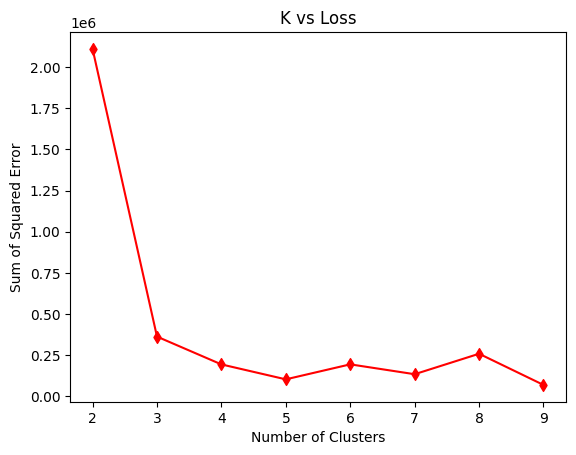

In [ ]:
# Loss vs Plot Graph
plt.plot(k_value,losses,c='r')
plt.scatter(k_value,losses,c='r',marker='d')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')
plt.title('K vs Loss')
plt.show()

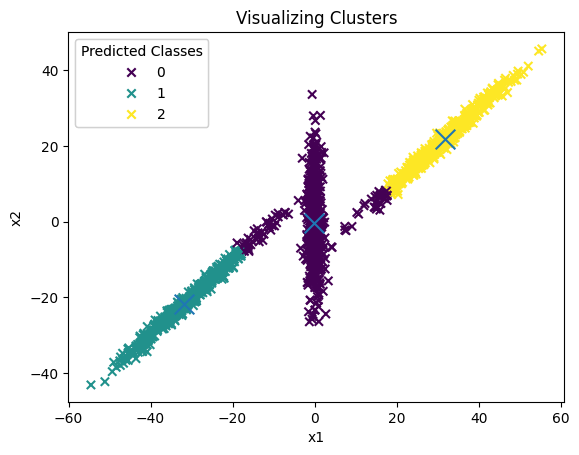

In [ ]:
k = k_value.index(3) #take the index for the k value = 3
labels = all_labels[k] #take all the assigned labels from the index
centroids = all_centroids[k].values() #all centroids for this K
fig, ax = plt.subplots()
scatter = ax.scatter([p[0] for p in X], [p[1] for p in X], c=labels,marker='x') #plotting the points
ax.scatter([p[0] for p in centroids], [p[1] for p in centroids],marker='x',s=200) #plotting the centroids
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Predicted Classes")
ax.add_artist(legend1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Visualizing Clusters')
plt.show()